In [2]:
import pandas as pd
import pickle 

df = pd.read_csv(r"C:\Users\Admin\Desktop\CARDIO_PROJECT\MAIN\Heart_Dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              308854 non-null  int64  
 1   general_health          308854 non-null  int64  
 2   checkup                 308854 non-null  int64  
 3   exercise                308854 non-null  int64  
 4   depression              308854 non-null  int64  
 5   diabetes                308854 non-null  int64  
 6   arthritis               308854 non-null  int64  
 7   age_category            308854 non-null  int64  
 8   sex_Male                308854 non-null  float64
 9   sex_Female              308854 non-null  float64
 10  height                  308854 non-null  int64  
 11  weight                  308854 non-null  float64
 12  bmi                     308854 non-null  float64
 13  alcohol_consumption     308854 non-null  int64  
 14  fruit_consumption   

In [3]:
df['heart_disease'].value_counts()

heart_disease
0    283883
1     24971
Name: count, dtype: int64

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop('heart_disease', axis=1)
y = df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

balanced_df = X_resampled.copy()
balanced_df['heart_disease'] = y_resampled

print(balanced_df['heart_disease'].value_counts())

balanced_df.head(25)

heart_disease
0    227109
1    227109
Name: count, dtype: int64


,Unnamed: 0,general_health,checkup,exercise,depression,diabetes,arthritis,age_category,sex_Male,sex_Female,height,weight,bmi,alcohol_consumption,fruit_consumption,vegetables_consumption,potato_consumption,smoking_history_No,smoking_history_Yes,heart_disease
0,192601,4,2,1,0,0,0,2,0.0,1.0,160,67.13,26.22,12,10,25,20,0.0,1.0,0
1,196337,4,2,0,0,0,0,1,0.0,1.0,155,63.50,26.45,1,2,4,8,0.0,1.0,0
2,99888,4,2,1,0,0,0,3,0.0,1.0,152,95.25,41.01,2,30,8,8,1.0,0.0,0
3,282228,2,4,1,0,0,0,1,1.0,0.0,188,117.93,33.38,25,30,20,8,1.0,0.0,0
4,216188,0,2,1,0,0,0,3,1.0,0.0,180,99.79,30.68,0,2,8,4,1.0,0.0,0
5,101680,4,2,1,1,0,0,0,0.0,1.0,173,165.56,55.50,0,60,8,12,1.0,0.0,0
6,164995,1,2,1,0,3,0,2,1.0,0.0,175,83.91,27.32,0,60,30,2,1.0,0.0,0
7,299371,0,0,1,0,0,0,3,1.0,0.0,183,90.72,27.12,0,0,0,12,1.0,0.0,0
8,58190,2,2,0,0,0,1,1,0.0,1.0,163,54.43,20.60,3,16,16,1,0.0,1.0,0
9,215508,3,2,1,0,0,1,1,0.0,1.0,170,52.16,18.01,0,30,4,1,1.0,0.0,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle


X = balanced_df.drop(['Unnamed: 0', 'heart_disease'], axis=1)
y = balanced_df['heart_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set: {X_train.shape}, Testing set: {X_test.shape}')

Training set: (363374, 18), Testing set: (90844, 18)


In [8]:
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Save the model to a pickle file
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

Accuracy: 0.9331


Accuracy: 0.9331

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     45329
           1       0.96      0.90      0.93     45515

    accuracy                           0.93     90844
   macro avg       0.93      0.93      0.93     90844
weighted avg       0.93      0.93      0.93     90844



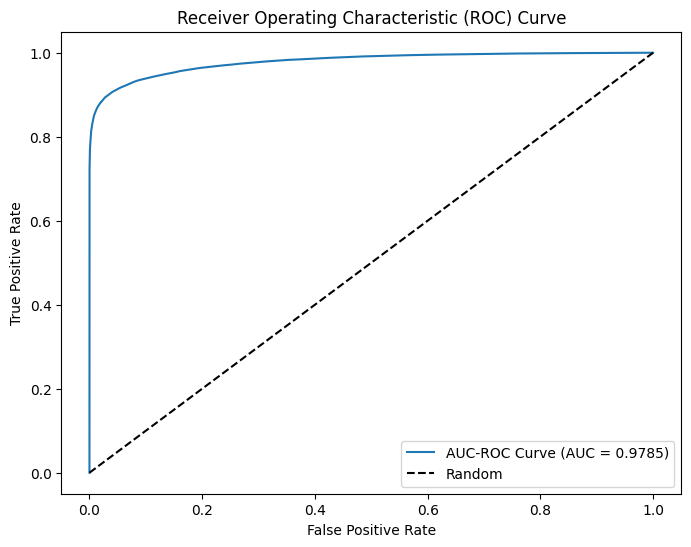

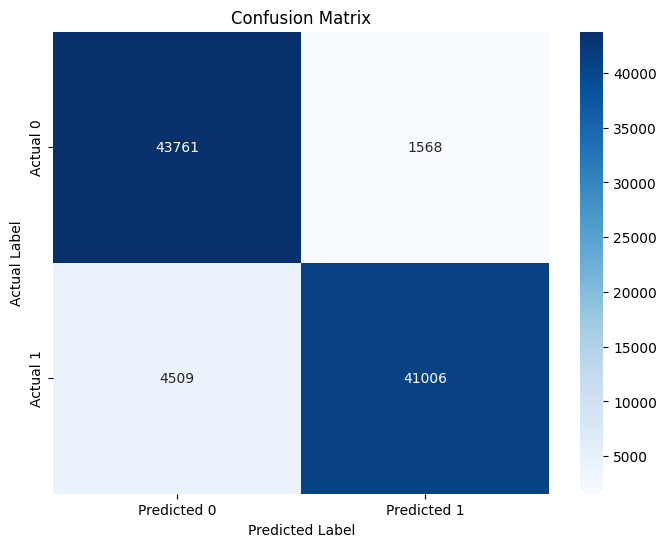

In [19]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print the entire classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC-ROC score and plot the ROC curve
y_prob = rf_model.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_prob)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC-ROC Curve (AUC = {auc_roc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
